In [7]:
from DINO_model import *
import torch

In [8]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [9]:
# this code is from https://medium.com/@aryanjadon/visualizing-attention-in-vision-transformer-c871908d86de
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
def transform(img, img_size):
    img = transforms.Resize(img_size)(img)
    img = transforms.ToTensor()(img)
    return img


def visualize_predict(model, img, img_size, patch_size, device):
    img_pre = transform(img, img_size)
    attention = visualize_attention(model, img_pre, patch_size, device)
    plot_attention(img, attention)


def visualize_attention(model, img, patch_size, device):
    # make the image divisible by the patch size
    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - \
        img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0)

    w_featmap = img.shape[-2] // patch_size
    h_featmap = img.shape[-1] // patch_size

    attentions = model.get_last_selfattention(img.to(device))

    nh = attentions.shape[1]  # number of head

    # keep only the output patch attention
    attentions = attentions[0, :, 0, 1:].reshape(nh, -1)

    attentions = attentions.reshape(nh, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(
        0), scale_factor=patch_size, mode="nearest")[0].detach().cpu().numpy()

    return attentions


def plot_attention(img, attention):
    n_heads = attention.shape[0]

    plt.figure(figsize=(10, 10))
    text = ["Original Image", "Head Mean"]
    for i, fig in enumerate([img, np.mean(attention, 0)]):
        plt.subplot(1, 2, i+1)
        plt.imshow(fig, cmap='inferno')
        plt.title(text[i])
    plt.show()

    plt.figure(figsize=(10, 10))
    for i in range(n_heads):
        plt.subplot(n_heads//3, 3, i+1)
        plt.imshow(attention[i], cmap='inferno')
        plt.title(f"Head n: {i+1}")
    plt.tight_layout()
    plt.show()

## DINO trained on IMAGENET dataset

In [16]:
vits8 = torch.hub.load('facebookresearch/dino:main', 'dino_vits8').to(device)
vits8.eval()

Using cache found in /home/peter/.cache/torch/hub/facebookresearch_dino_main
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_pretrain/dino_deitsmall8_pretrain.pth" to /home/peter/.cache/torch/hub/checkpoints/dino_deitsmall8_pretrain.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82.7M/82.7M [00:02<00:00, 34.7MB/s]


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(8, 8), stride=(8, 8))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate=none)
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attentio

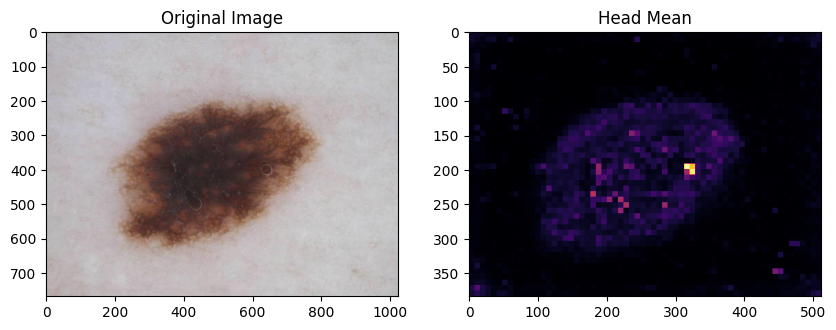

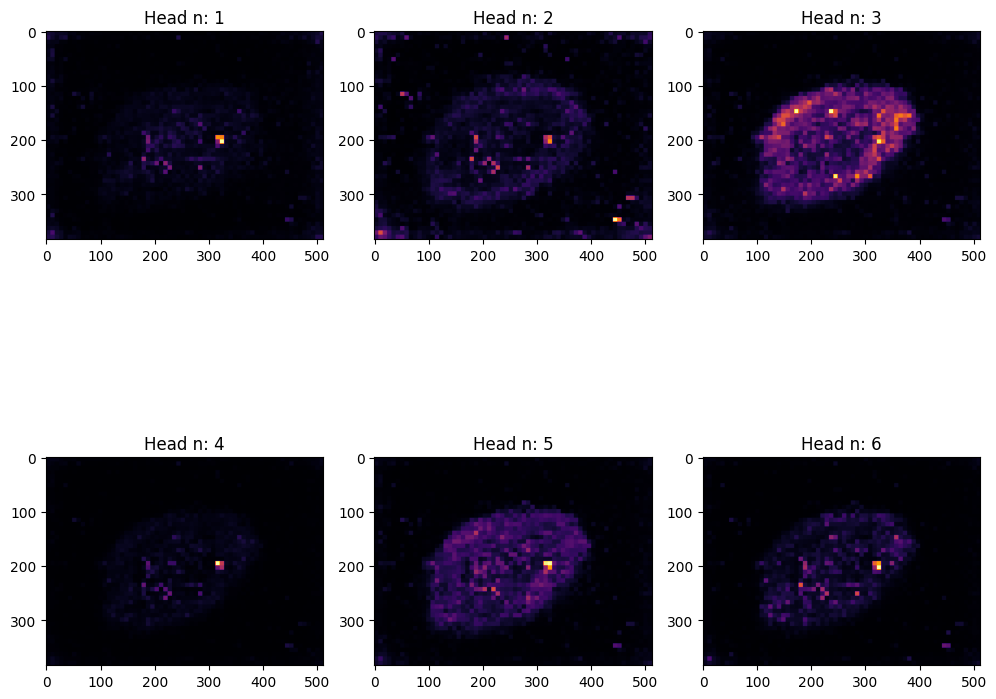

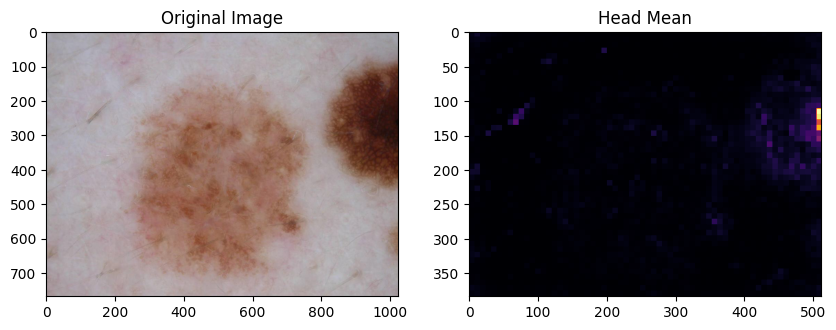

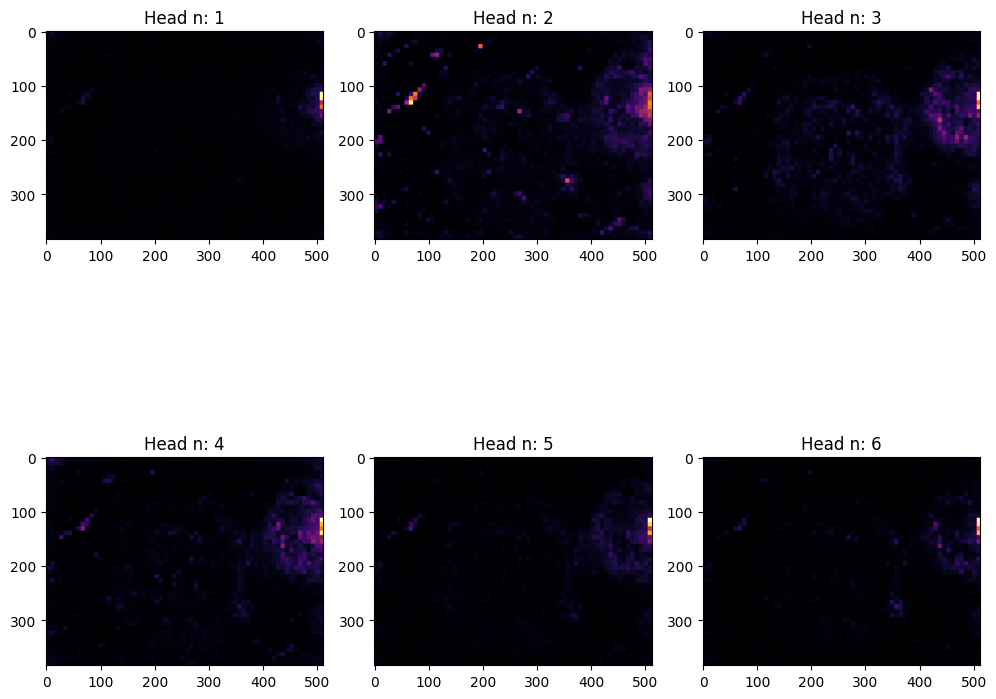

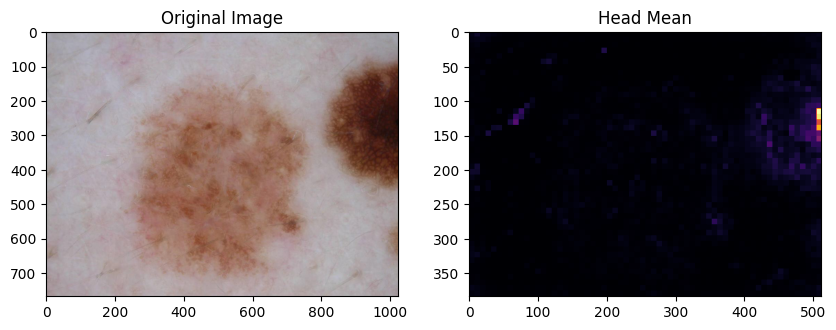

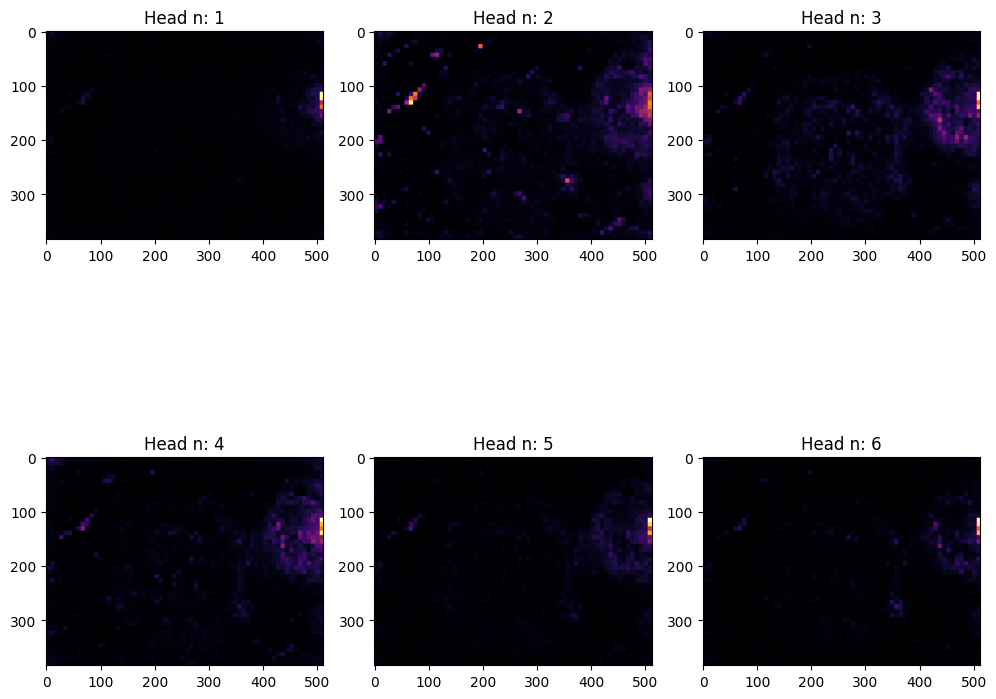

In [17]:
from PIL import Image
import numpy as np
path1 = '/home/peter/Desktop/ISIC_Data/DINO/test_data/NV/ISIC_0000028_downsampled.jpg'
img1 = Image.open(path1)
path2 = '/home/peter/Desktop/ISIC_Data/DINO/test_data/NV/ISIC_0000032_downsampled.jpg'
img2 = Image.open(path2)
path3 = '/home/peter/Desktop/ISIC_Data/DINO/test_data/NV/ISIC_0000032_downsampled.jpg'
img3 = Image.open(path3)
factor_reduce = 2
img_size1 = tuple(np.array(img1.size[::-1]) // factor_reduce) 
img_size2 = tuple(np.array(img2.size[::-1]) // factor_reduce) 
img_size3 = tuple(np.array(img3.size[::-1]) // factor_reduce) 
visualize_predict(vits8, img1, img_size1, 8, device)
visualize_predict(vits8, img2, img_size2, 8, device)
visualize_predict(vits8, img3, img_size3, 8, device)

## DINO trained on ISIC 2019 dataset

In [10]:
student_vit = torch.load("./checkpoint/dino_best_model.pth",map_location=torch.device(device))
student_vit.eval()

MultiCropWrapper(
  (backbone): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 384, kernel_size=(8, 8), stride=(8, 8))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=384, out_features=1152, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=384, out_features=384, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=384, out_features=1536, bias=True)
          (act): GELU(approximate=none)
          (fc2): Linear(in_features=1536, out_features=384, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (1): Block(
        (norm

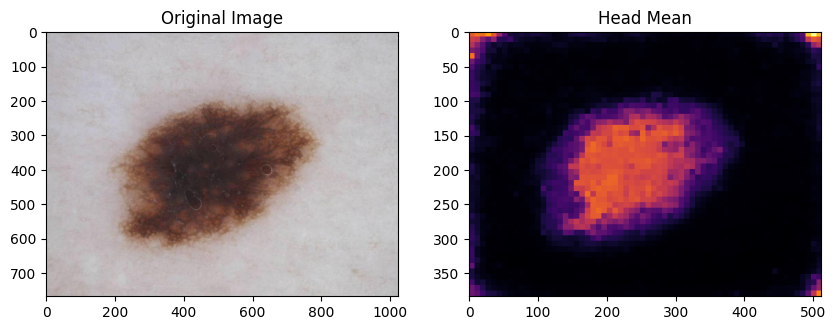

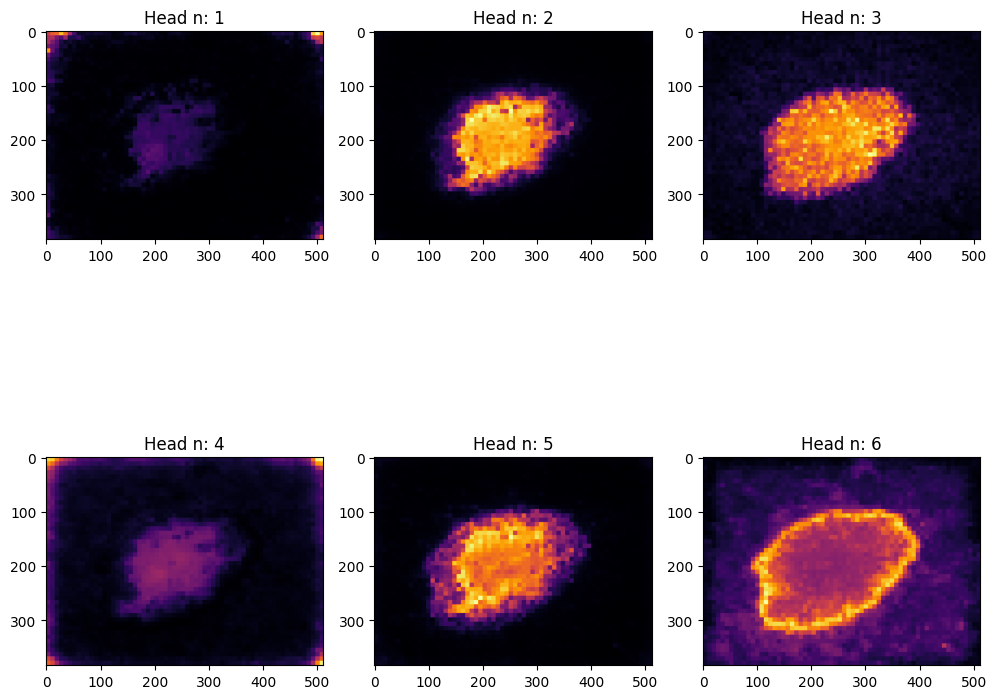

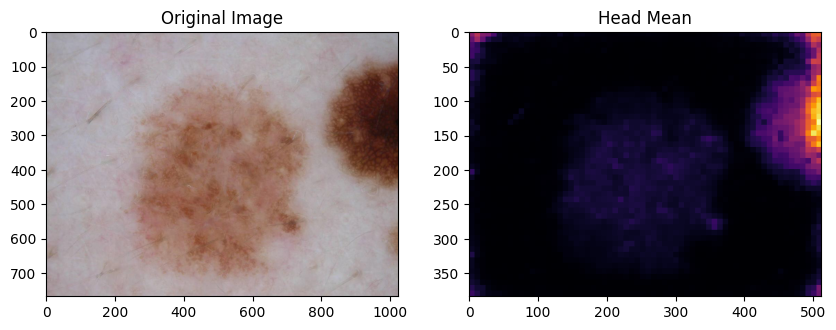

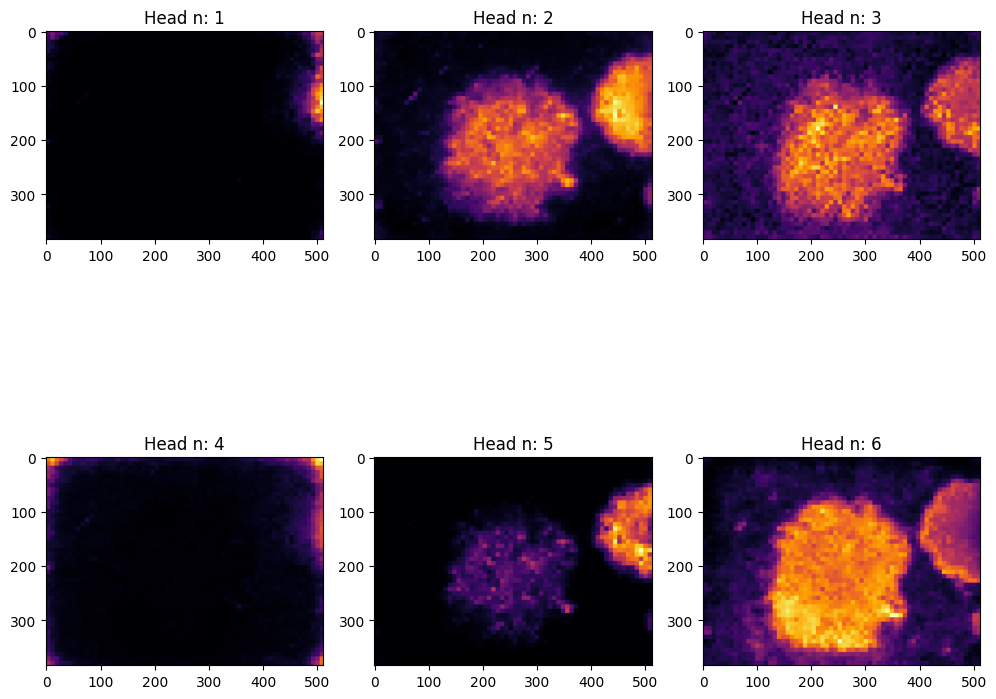

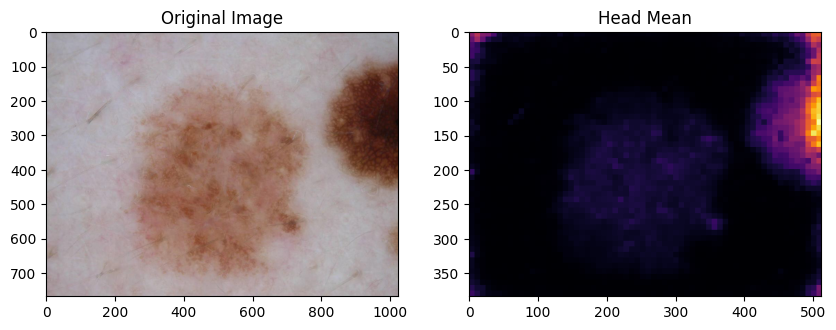

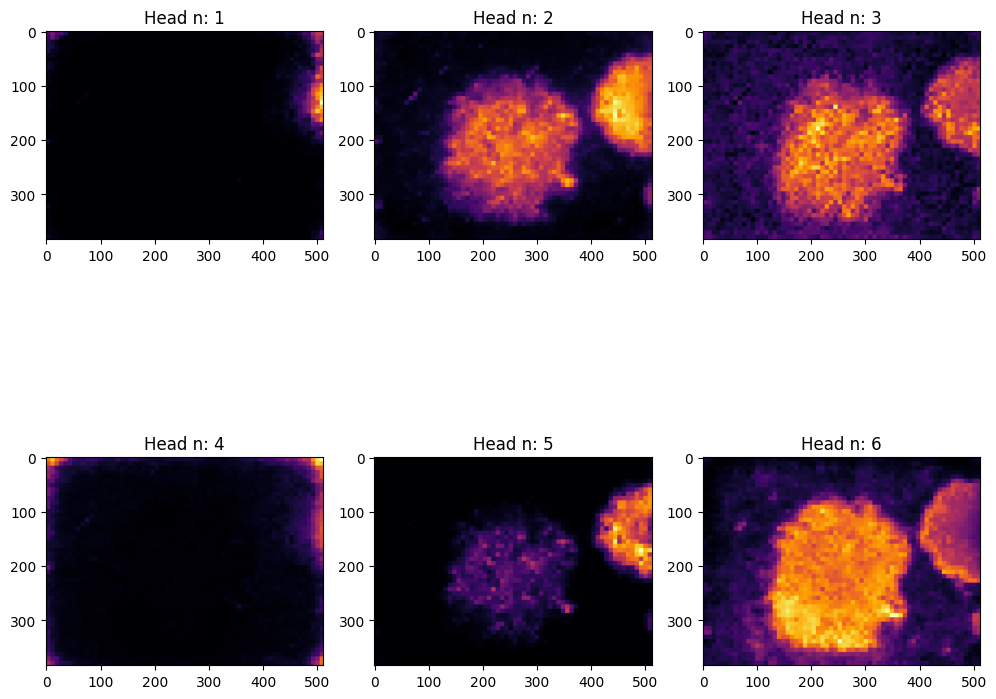

In [13]:

path1 = '/home/peter/Desktop/ISIC_Data/DINO/test_data/NV/ISIC_0000028_downsampled.jpg'
img1 = Image.open(path1)
path2 = '/home/peter/Desktop/ISIC_Data/DINO/test_data/NV/ISIC_0000032_downsampled.jpg'
img2 = Image.open(path2)
path3 = '/home/peter/Desktop/ISIC_Data/DINO/test_data/NV/ISIC_0000032_downsampled.jpg'
img3 = Image.open(path3)
factor_reduce = 2
img_size1 = tuple(np.array(img1.size[::-1]) // factor_reduce) 
img_size2 = tuple(np.array(img2.size[::-1]) // factor_reduce) 
img_size3 = tuple(np.array(img3.size[::-1]) // factor_reduce) 
visualize_predict(student_vit.backbone, img1, img_size1, 8, device)
visualize_predict(student_vit.backbone, img2, img_size2, 8, device)
visualize_predict(student_vit.backbone, img3, img_size3, 8, device)